In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import pickle
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import pairwise_distances
import pandas as pd
import seaborn as sns

In [2]:
input_data = pickle.load(open('../../model/output/german0316_margin_0.5_alpha_0.95_multiply.pkl', 'rb'))
rules = input_data['paths']

In [3]:
s_conf = np.zeros(len(rules[0]['sample']))
for r in rules:
    s_conf += np.array(r['sample'])# * r['value']
s_conf /= np.max(np.abs(s_conf))
r_conf = np.array([r['confidence'] for r in rules])
mat = np.array([np.array(r['sample']) for r in rules])
mat = mat.astype(np.float32)

In [42]:
def anomaly_detection(mat, n_neighbors = 20):
    mat_t = mat.copy().transpose()
    '''
    for i in range(mat.shape[0]):
        mat[i, :] /= mat[i].sum()
    for i in range(mat_t.shape[0]):
        mat_t[i, :] /= mat_t[i].sum()
    '''
    r_dist = pairwise_distances(X = mat, metric='euclidean')
    clf = LocalOutlierFactor(metric="precomputed", n_neighbors=n_neighbors)
    clf.fit(r_dist)
    row_lof = -clf.negative_outlier_factor_

    s_dist = pairwise_distances(X = mat_t, metric='euclidean') 
    clf = LocalOutlierFactor(metric="precomputed", n_neighbors=n_neighbors)
    clf.fit(s_dist)
    col_lof = -clf.negative_outlier_factor_

    return row_lof, col_lof

In [6]:
mat2 = np.array([[1,1,1,0,0],[1,1,1,0,0],[1,1,1,0,1],[0,0,0,1,1]]).astype(np.float64)
r_lof, s_lof = anomaly_detection(mat2, n_neighbors = 2)
print(r_lof, s_lof)

[1.        1.        1.        2.8058837] [1.00000000e+00 1.00000000e+00 1.00000000e+00 4.65451830e+09
 7.07106781e+09]


In [43]:
mat = np.array([np.array(r['sample']) for r in rules])
mat = mat.astype(np.float32)

#r_lof, s_lof = anomaly_detection(mat)
r_lof, s_lof = anomaly_detection(mat, n_neighbors = 20)

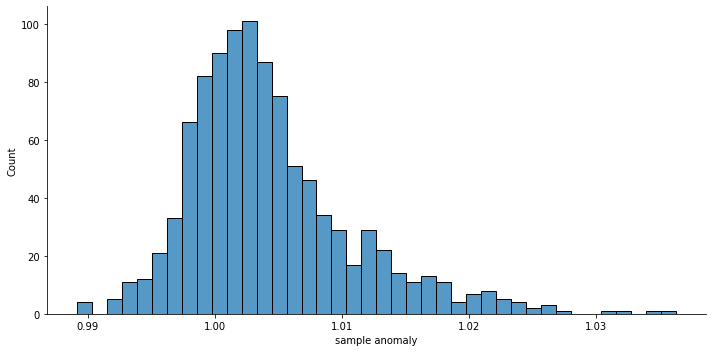

In [95]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({ 'sample anomaly': s_lof })
sns.displot(df, x='sample anomaly', bins=40, aspect=2)


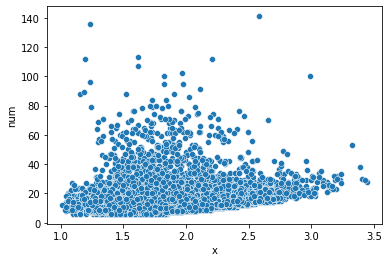

In [76]:
from utils import plot_anomaly
plot_anomaly(mat, r_lof, s_lof, 'rule', 'num', anomaly_precent = 0.05, filter_num = 5)

In [46]:
mat0 = mat.copy()
for i in range(mat0.shape[0]):
    mat0[i] /= mat0[i].sum()
r_dist = pairwise_distances(X = mat0, metric='euclidean')
col_lof = r_lof.copy()
sorted_lof = np.argsort(col_lof)
large_lof = sorted_lof[-5:][::-1]


In [47]:
all_r_dist = r_dist.copy().reshape((r_dist.shape[0] * r_dist.shape[1]))
all_r_dist.sort()

In [48]:
print(len(all_r_dist))

110124036


In [9]:
import bisect

1. one cluster or severa

In [77]:
for i in large_lof:
    print('#', i, col_lof[i], np.sum(rules[i]['sample']))#, rules[i]['range'])
    nearests = np.argsort(r_dist[i])[1:5]
    print('Similar:')
    for j in nearests:
        print('#', j, r_dist[i][j], bisect.bisect(all_r_dist, r_dist[i][j]) / len(all_r_dist), col_lof[j])#, rules[j]['range'])
    print('---------------------------------------------')

# 1369 3.4436848 28
Similar:
# 1216 0.1972386 0.0009847623092927688 2.211565
# 7023 0.19814233 0.001021484537671685 2.5855875
# 5084 0.19867986 0.0010473099623773325 2.2842717
# 9453 0.19991496 0.0011007224617158057 1.7310019
---------------------------------------------
# 6723 3.426042 29
Similar:
# 7023 0.18237315 0.0005348151242840391 2.5855875
# 2841 0.18890645 0.0006961059799878747 2.021143
# 4496 0.18974735 0.0007230937304186708 1.7387558
# 543 0.1911421 0.000765318844652588 1.8418993
---------------------------------------------
# 3281 3.4055068 30
Similar:
# 9360 0.1825742 0.0005416619492587431 2.255198
# 7023 0.19142368 0.0007726378644531336 2.5855875
# 2222 0.19174126 0.0007834075387502143 1.2383668
# 945 0.19493589 0.0008934652558502305 1.8246466
---------------------------------------------
# 1582 3.3921554 38
Similar:
# 3353 0.15403685 0.00018324791510547253 1.8470892
# 1216 0.15632047 0.00019772250265146475 2.211565
# 1164 0.16366342 0.0002580726336619192 1.1958067
# 2222

<AxesSubplot:xlabel='x', ylabel='y'>

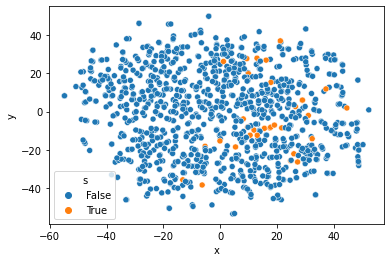

In [96]:
df = pd.DataFrame({ 'x': X[:, 0], 'y': X[:, 1], 's': s_lof > 1.02 })
sns.scatterplot(data=df, x='x', y='y', hue='s')

In [89]:
[input_data['features'][i]['name'] for i in rules[1369 ]['range']]

['employment_duration', 'savings', 'property', 'age', 'present_residence']

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
from sklearn.manifold import TSNE

mat1 = mat.copy().transpose()
for i in range(mat1.shape[0]):
    mat1[i] /= mat1[i].sum()
s_dist = pairwise_distances(X = mat1, metric='euclidean')
X = TSNE(n_components=2, metric='precomputed').fit_transform(s_dist)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.


In [37]:
np.sum(rules[819]['sample'])

3

In [83]:
input_data['features'][0]

{'name': 'status',
 'range': [0, 4],
 'values': [0, 1, 2, 3],
 'min': 1,
 'importance': 0.1706977937482522,
 'dtype': 'category'}